# Project:- Vaccine-tweets-Sentiment-Analysis

#### Aim- in this project we are going to predict  vaccine related tweets are wheather Positive or Negative

Data Loading

In [20]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from textblob import TextBlob


In [21]:
data=pd.read_csv('vaccination_tweets.csv')

In [22]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [23]:
data.shape

(4817, 16)

In [24]:
print('number of unique users',len(data['user_name'].unique()))

number of unique users 3246


In [25]:
print(data['user_location'].isna().sum())

993


In [26]:
data2=data.copy()

In [27]:
data=data[['id','text']]

In [28]:
data.head()

,id,text
0,1340539111971516416,Same folks said daikon paste could treat a cyt...
1,1338158543359250433,While the world has been on the wrong side of ...
2,1337858199140118533,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,1337855739918835717,"Facts are immutable, Senator, even when you're..."
4,1337854064604966912,Explain to me again why we need a vaccine @Bor...


## Text Cleanings and Preprocessing

1.Removing Punctuations

2.Removing Hyperlinks ,mentions,hashtags,retweets

3.Removing Stopwords

4.Vectorization

5.TF-IDF and BOW

In [29]:
data['text'][3]
print(len(data['text'][3]))

140


crating function which can remove Hyperlinks ,mentions,hashtags,retweets and Urls

In [30]:
def cleanUpTweet(txt):
    #remove mentions
    txt=re.sub(r'@[A-Za-z0-9_]+', '', txt)
    
    #remove hashtags
    txt=re.sub(r'#', '', txt)
    
    #remove retweets
    txt=re.sub(r'RT: ', '', txt)
    
    #remove urls
    txt=re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt
               
    

In [31]:
data['text']=data['text'].apply(cleanUpTweet)

In [32]:
print(data['text'][3])
print('\n')
print(len(data['text'][3]))


Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… 


117


In [14]:
import nltk
import string

In [15]:
from nltk.corpus import stopwords
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

creating a Function which can removes stopwords and punctuations

In [16]:
def text_preprocess(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    
    nopunc=''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [17]:
data['text']=data['text'].apply(text_preprocess)

#### Determining Subjectivity and Polarity of text using TextBlob

In [33]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity


In [34]:
data['Subjectivity'] = data['text'].apply(getTextSubjectivity)
data['Polarity'] = data['text'].apply(getTextPolarity)

In [35]:
data.head()

,id,text,Subjectivity,Polarity
0,1340539111971516416,Same folks said daikon paste could treat a cyt...,0.125000,0.00
1,1338158543359250433,While the world has been on the wrong side of ...,0.900000,-0.50
2,1337858199140118533,coronavirus SputnikV AstraZeneca PfizerBioNTec...,0.033333,0.00
3,1337855739918835717,"Facts are immutable, Senator, even when you're...",0.550000,-0.05
4,1337854064604966912,Explain to me again why we need a vaccine wh...,0.000000,0.00


#### Negative, Natural, Positive analysis

In [37]:
def getTextAnalysis(a):
    if a<0:
        return "Negative"
    
    elif a==0:
        return "Neutral"
    
    else:
        return "Positive"
      

In [38]:
data['Sentiment']=data['Polarity'].apply(getTextAnalysis)

In [39]:
data.head()

,id,text,Subjectivity,Polarity,Sentiment
0,1340539111971516416,Same folks said daikon paste could treat a cyt...,0.125000,0.00,Neutral
1,1338158543359250433,While the world has been on the wrong side of ...,0.900000,-0.50,Negative
2,1337858199140118533,coronavirus SputnikV AstraZeneca PfizerBioNTec...,0.033333,0.00,Neutral
3,1337855739918835717,"Facts are immutable, Senator, even when you're...",0.550000,-0.05,Negative
4,1337854064604966912,Explain to me again why we need a vaccine wh...,0.000000,0.00,Neutral


In [40]:
positive_tweets = data[data['Sentiment'] == 'Positive']

print(str(positive_tweets.shape[0]/(data.shape[0])*100) + " % of positive tweets")

43.38800083039236 % of positive tweets


In [43]:
data['Sentiment'].value_counts()

Neutral     2230
Positive    2090
Negative     497
Name: Sentiment, dtype: int64

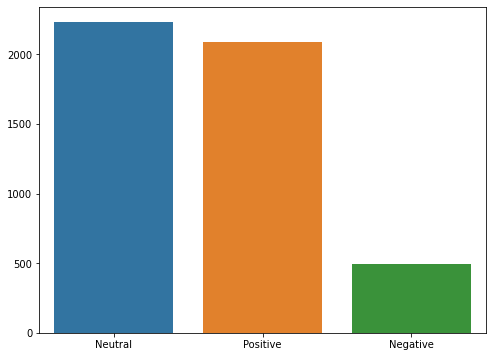

In [50]:
plt.figure(figsize=(8,6))

sns.barplot(x=data['Sentiment'].value_counts().index.values,y=data['Sentiment'].value_counts().values)

plt.show()

In [59]:
data[data['Sentiment']=='Positive']['text']

5       Does anyone have any useful advice/guidance fo...
7       There have not been many bright days in 2020 b...
10      while deaths are closing in on the 300,000 mar...
11       COVID19 CovidVaccine vaccine Corona   PfizerB...
12      The agency also released new information for h...
                              ...                        
4810    The impact of the new EMA guidance on doses pe...
4812    First dose of Covid 19 vaccine received 💉  ✅. ...
4814    A sense of relief and optimism : just got my f...
4815    PfizerBioNTech : single dose about 52% effecti...
4816     PfizerBioNTech : single dose about 52% effect...
Name: text, Length: 2090, dtype: object

In [64]:
data[data['Sentiment']=='Negative']['text']

1       While the world has been on the wrong side of ...
3       Facts are immutable, Senator, even when you're...
6       it is a bit sad to claim the fame for success ...
18      . will rake in billions from its expensive Cov...
19      The trump administration failed to deliver on ...
                              ...                        
4758       Shocking. Second vaccine delay, not approve...
4772     Too bad  is gettin played by  \n\nBetter give...
4774    Can’t explain How relieved I am to have both m...
4800    How long you think this is going on for? Hones...
4809    If you look at all cause mortality the world o...
Name: text, Length: 497, dtype: object

In [65]:
data[data['Sentiment']=='Negative']['text'][1]

"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… "

In [107]:
from sklearn.feature_extraction.text import CountVectorizer

In [108]:
cv=CountVectorizer()

In [109]:
X=cv.fit_transform(X)

In [110]:
print(X)

  (0, 6073)	1
  (0, 2874)	1
  (0, 6060)	1
  (0, 1930)	1
  (0, 5102)	1
  (0, 1744)	1
  (0, 7137)	1
  (0, 1921)	1
  (0, 6645)	1
  (0, 5193)	1
  (1, 7721)	1
  (1, 6923)	3
  (1, 7814)	1
  (1, 3268)	1
  (1, 931)	1
  (1, 4924)	1
  (1, 7843)	1
  (1, 6345)	1
  (1, 4890)	1
  (1, 3393)	1
  (1, 6970)	1
  (1, 7860)	1
  (1, 3429)	1
  (1, 1010)	1
  (1, 7415)	1
  :	:
  (4814, 3108)	1
  (4814, 6213)	1
  (4814, 4961)	1
  (4814, 3574)	1
  (4815, 5193)	1
  (4815, 325)	1
  (4815, 715)	2
  (4815, 2246)	3
  (4815, 2366)	2
  (4815, 6172)	1
  (4815, 6375)	2
  (4815, 3810)	1
  (4815, 307)	1
  (4815, 215)	1
  (4816, 5193)	1
  (4816, 325)	1
  (4816, 715)	1
  (4816, 2246)	2
  (4816, 2366)	2
  (4816, 2202)	1
  (4816, 6172)	1
  (4816, 6375)	2
  (4816, 3810)	1
  (4816, 307)	1
  (4816, 215)	1


In [111]:
from sklearn.feature_extraction.text import TfidfTransformer

In [113]:
tfidf_transformer=TfidfTransformer().fit(X)
tfidf=tfidf_transformer.transform(X)
print(tfidf)

  (0, 7137)	0.347195302214288
  (0, 6645)	0.36972910372275025
  (0, 6073)	0.2744688286472162
  (0, 6060)	0.22488944866107438
  (0, 5193)	0.0733187995751611
  (0, 5102)	0.38761518820958113
  (0, 2874)	0.312414467366282
  (0, 1930)	0.38761518820958113
  (0, 1921)	0.38761518820958113
  (0, 1744)	0.2512615405896752
  (1, 7860)	0.20902317750034188
  (1, 7843)	0.29782252670952225
  (1, 7814)	0.21366707042911245
  (1, 7721)	0.2566087957751088
  (1, 7646)	0.16918810295364886
  (1, 7500)	0.21707943670460797
  (1, 7415)	0.1621558828709331
  (1, 6970)	0.1390481775968681
  (1, 6923)	0.2081571921923906
  (1, 6345)	0.19794937192270926
  (1, 4924)	0.13459509512829804
  (1, 4890)	0.0899401997419383
  (1, 3429)	0.2734330595951642
  (1, 3393)	0.25980219721470926
  (1, 3268)	0.1621558828709331
  :	:
  (4814, 2246)	0.1645739791128222
  (4814, 1828)	0.17866906165979285
  (4814, 1788)	0.33351702186007154
  (4814, 599)	0.1348905406796648
  (4815, 6375)	0.48932198616772876
  (4815, 6172)	0.16963748315279845
 

#### Train Test Split

In [105]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model building --- Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
model_lr=LogisticRegression()

In [118]:
model_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Model Evaluation

In [119]:
y_pred=model_lr.predict(X_test)

In [133]:
from sklearn.metrics import classification_report,confusion_matrix

In [122]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.25      0.78      0.38        51
     Neutral       0.95      0.75      0.84       819
    Positive       0.80      0.88      0.84       576

   micro avg       0.80      0.80      0.80      1446
   macro avg       0.66      0.80      0.68      1446
weighted avg       0.86      0.80      0.82      1446



### Model Building -- MultinomialNB

In [123]:
from sklearn.naive_bayes import MultinomialNB

In [124]:
model_nb=MultinomialNB().fit(tfidf, data['Sentiment'])

In [130]:
pred_y=model_nb.predict(X_test)
print(classification_report(pred_y,y_test))

              precision    recall  f1-score   support

    Negative       0.06      1.00      0.12        10
     Neutral       0.87      0.90      0.89       629
    Positive       0.98      0.77      0.86       807

   micro avg       0.83      0.83      0.83      1446
   macro avg       0.64      0.89      0.62      1446
weighted avg       0.93      0.83      0.87      1446

